iMPORTAMOS LAS LIBRERÍAS 

In [1]:
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport as pr
import pandas as pd
import folium
from folium.plugins import HeatMap
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import re

CARGAMOS LOS ARCHIVOS 

In [2]:
#cargar los archivos
df_homicidios = pd.read_csv('Data/homicidios.csv')


In [4]:
df_homicidios

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO,Hay Cruce
0,2016-0001,1,2016-01-01,2016,1,1,1900-01-01 04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.475340,-34.687570,MOTO-AUTO,MOTO,AUTO,True
1,2016-0002,1,2016-01-02,2016,1,2,1900-01-01 01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.508775,-34.669777,AUTO-PASAJEROS,AUTO,PASAJEROS,True
2,2016-0003,1,2016-01-03,2016,1,3,1900-01-01 07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.390403,-34.631894,MOTO-AUTO,MOTO,AUTO,False
3,2016-0004,1,2016-01-10,2016,1,10,1900-01-01 00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.465039,-34.680930,MOTO-SD,MOTO,SD,True
4,2016-0005,1,2016-01-21,2016,1,21,1900-01-01 05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.387183,-34.622466,MOTO-PASAJEROS,MOTO,PASAJEROS,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,2021-0093,1,2021-12-13,2021,12,13,1900-01-01 17:10:00,17,AV. RIESTRA Y MOM,AVENIDA,...,MOM,RIESTRA AV. y MOM,7,Point (102728.60090138 98186.24929177),-58.433538,-34.645616,MOTO-AUTO,MOTO,AUTO,True
692,2021-0094,1,2021-12-20,2021,12,20,1900-01-01 01:10:00,1,AU DELLEPIANE Y LACARRA,AUTOPISTA,...,LACARRA AV.,"DELLEPIANE, LUIS, TTE. GRAL. y LACARRA AV.",9,Point (99624.29795829 97569.69801131),-58.467398,-34.651178,MOTO-AUTO,MOTO,AUTO,True
693,2021-0095,1,2021-12-30,2021,12,30,1900-01-01 00:43:00,0,AV. GAONA Y TERRADA,AVENIDA,...,TERRADA,GAONA AV. y TERRADA,11,Point (99116.45492358 101045.23284826),-58.472934,-34.619847,MOTO-CARGAS,MOTO,CARGAS,True
694,2021-0096,1,2021-12-15,2021,12,15,1900-01-01 10:30:00,10,AV. EVA PERON 4071,AVENIDA,...,NaN,"PERON, EVA AV. 4071",9,Point (99324.54463985 97676.26932409),-58.470668,-34.650217,AUTO-CARGAS,AUTO,CARGAS,False


In [3]:
df_homicidios.columns

Index(['ID', 'N_VICTIMAS', 'FECHA', 'AAAA', 'MM', 'DD', 'HORA', 'HH',
       'LUGAR_DEL_HECHO', 'TIPO_DE_CALLE', 'Calle', 'Cruce',
       'Dirección Normalizada', 'COMUNA', 'XY (CABA)', 'pos x', 'pos y',
       'PARTICIPANTES', 'VICTIMA', 'ACUSADO', 'Hay Cruce'],
      dtype='object')

Numero de victimas
Primero se quiere saber el numero de victimas totales por año para empezar a conocer la problematica. Despues se piensa ver el número de victimas por año para saber como se distribuyen en el tiempo.

In [5]:
cantidad_victimas_total = df_homicidios["N_VICTIMAS"].sum()
cantidad_victimas_total

717

In [6]:
# Se buscan los valores unicos y se puede ver que hay hasta 3 victimas por siniestro
df_homicidios["N_VICTIMAS"].unique()

array([1, 2, 3], dtype=int64)

VICTIMAS POR AÑO

In [7]:
df_homicidios.groupby("AAAA")["N_VICTIMAS"].sum().reset_index()


,AAAA,N_VICTIMAS
0,2016,146
1,2017,140
2,2018,149
3,2019,104
4,2020,81
5,2021,97


En el 2018 hubo un mayor volumen de victimas,se observa que en el 2019 empieza a reducir con 104 victimas y en el 2020
baja a 81 victimas y en el 2021 tiene un incremento. 

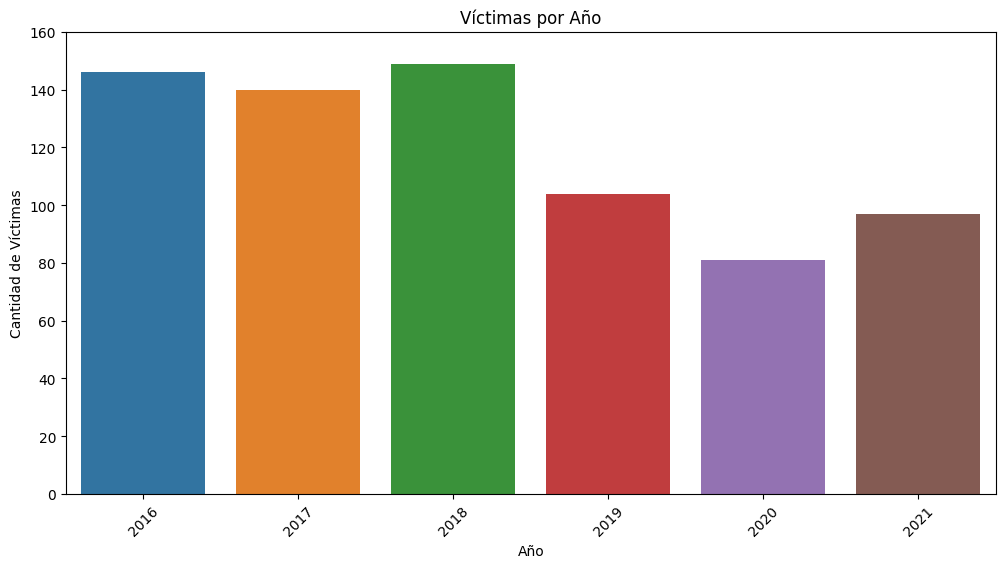

In [9]:
suma_victimas_por_año = df_homicidios.groupby("AAAA")["N_VICTIMAS"].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=suma_victimas_por_año, x="AAAA", y="N_VICTIMAS")
plt.title("Víctimas por Año")
plt.xlabel("Año")
plt.ylabel("Cantidad de Víctimas")
plt.xticks(rotation=45)
plt.ylim(0, 160)
plt.show()

VICTIMAS POR SEMESTRE DE CADA AÑO
Se crea una columna que incluye el número de victimas por semestre, ya que muchas veces el periodo de tiempo de un año es muy extenso por lo que se busca conocer si hay un cambio semestral del numero de victimas.

In [10]:
def determinar_semestre(mes):
    if mes <= 6:
        return 1
    else:
        return 2


df_homicidios["Semestre"] = df_homicidios["MM"].apply(determinar_semestre)

In [12]:
df_homicidios.groupby(["AAAA", "Semestre"])["N_VICTIMAS"].sum().reset_index()

,AAAA,Semestre,N_VICTIMAS
0,2016,1,65
1,2016,2,81
2,2017,1,69
3,2017,2,71
4,2018,1,70
5,2018,2,79
6,2019,1,57
7,2019,2,47
8,2020,1,31
9,2020,2,50


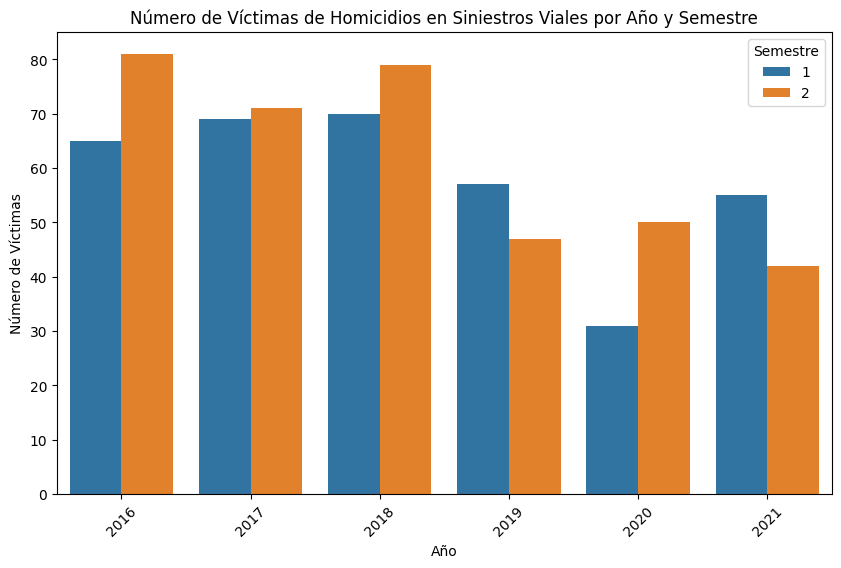

In [14]:
df_agregado = df_homicidios.groupby(["AAAA", "Semestre"])["N_VICTIMAS"].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=df_agregado, x="AAAA", y="N_VICTIMAS", hue="Semestre")
plt.title("Número de Víctimas de Homicidios en Siniestros Viales por Año y Semestre")
plt.xlabel("Año")
plt.ylabel("Número de Víctimas")
plt.xticks(rotation=45)
plt.legend(title="Semestre")
plt.show()

Calle más peligrosa
Se busca conocer cual es la calle más peligrosa para saber si esta nos ayuda a entender si los siniestros son aislados o ocurren en un solo lugar.

In [15]:
calle_mas_peligrosa = df_homicidios["Calle"].value_counts()
calle_mas_peligrosa 

PAZ, GRAL. AV.                                57
RIVADAVIA AV.                                 19
DEL LIBERTADOR AV.                            18
AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI    14
ALBERDI, JUAN BAUTISTA AV.                    13
                                              ..
PILCOMAYO                                      1
CERVANTES                                      1
CONGRESO AV.                                   1
AUSTRALIA AV.                                  1
PADRE CARLOS MUJICA                            1
Name: Calle, Length: 279, dtype: int64

Se observa que las calle mas peligrosa en CABA son: 
PAZ, GRAL. AV.                                57
RIVADAVIA AV.                                 19
DEL LIBERTADOR AV.                            18
AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI    14
ALBERDI, JUAN BAUTISTA AV.                    13

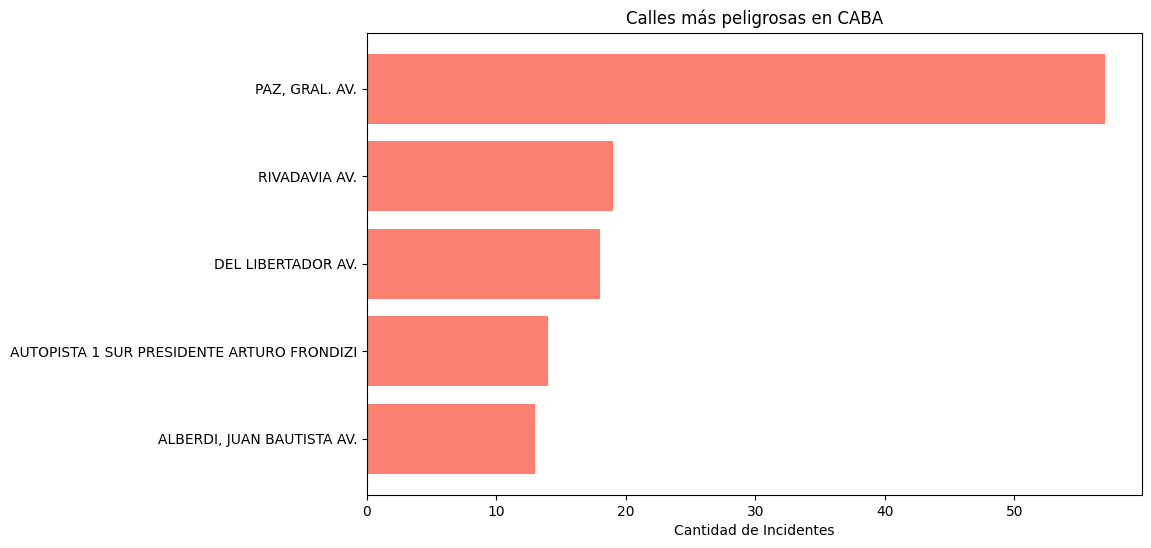

In [19]:
calles = ['PAZ, GRAL. AV.', 'RIVADAVIA AV.', 'DEL LIBERTADOR AV.', 'AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI', 'ALBERDI, JUAN BAUTISTA AV.']
cantidad = [57, 19, 18, 14, 13]

plt.figure(figsize=(10, 6))
plt.barh(calles, cantidad, color='salmon')
plt.xlabel('Cantidad de Incidentes')
plt.title('Calles más peligrosas en CABA')
plt.gca().invert_yaxis()  # Invierte el eje y para mostrar la calle más peligrosa arriba
plt.show()

Mapeo de los accidentes
Se plante utilizar las coordenadas para observar si los siniestros estan aislados en un punto o distribuidos por lo que se utiliza la libreria de geopandas y la columna XY CABA para conocer esta distribución.

In [20]:
data = {
    'Lugar': ['PAZ, GRAL. AV.', 'RIVADAVIA AV.', 'DEL LIBERTADOR AV.', 'AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI', 'ALBERDI, JUAN BAUTISTA AV.'],
    'Cantidad': [57, 19, 18, 14, 13],
    'Latitud': [-34.6295, -34.6051, -34.5626, -34.6406, -34.6484],
    'Longitud': [-58.5034, -58.4459, -58.4491, -58.3773, -58.3987]
}
df = pd.DataFrame(data)
# Crear un mapa centrado en Buenos Aires
mapa = folium.Map(location=[-34.6037, -58.3816], zoom_start=12)

# Añadir los puntos al mapa
for i, row in df.iterrows():
    folium.Marker(
        location=[row['Latitud'], row['Longitud']],
        popup=f"{row['Lugar']} - Cantidad: {row['Cantidad']}",
        icon=folium.Icon(color='red', icon='info-sign')
    ).add_to(mapa)

# Mostrar el mapa
mapa

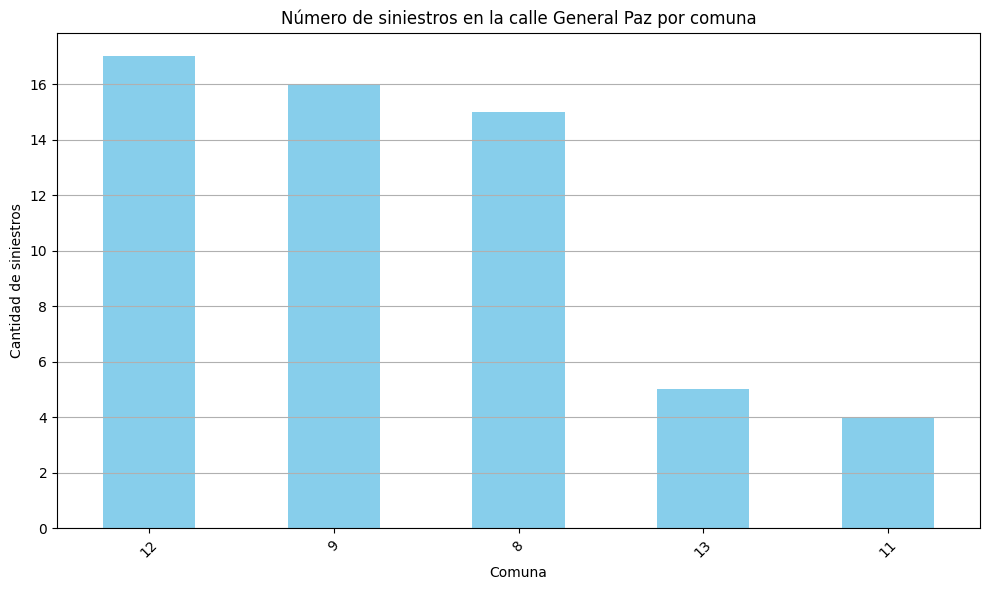

In [24]:
# Filtrar los datos por la calle "PAZ, GRAL. AV."
df_Gen_Paz = df_homicidios[df_homicidios["Calle"] == "PAZ, GRAL. AV."]

# Contar los siniestros por comuna
siniestros_por_comuna = df_Gen_Paz['COMUNA'].value_counts()

# Graficar el número de siniestros por comuna
plt.figure(figsize=(10, 6))
siniestros_por_comuna.plot(kind='bar', color='skyblue')
plt.title('Número de siniestros en la calle General Paz por comuna')
plt.xlabel('Comuna')
plt.ylabel('Cantidad de siniestros')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()

Número de Victimas por Comuna 
La ciudad autonoma de Buenos Aires esta dsitribuida en comunas por lo que saber cual tiene mayor letalidad puede ayudarnos a conocer más aun la problematica.

In [26]:
# Se genera un filtro que nos ayude a saber el numero de victimas por comuna.
df_homicidios.groupby(["COMUNA"])["N_VICTIMAS"].sum().reset_index()

,COMUNA,N_VICTIMAS
0,0,2
1,1,93
2,2,25
3,3,46
4,4,79
5,5,22
6,6,22
7,7,62
8,8,67
9,9,75


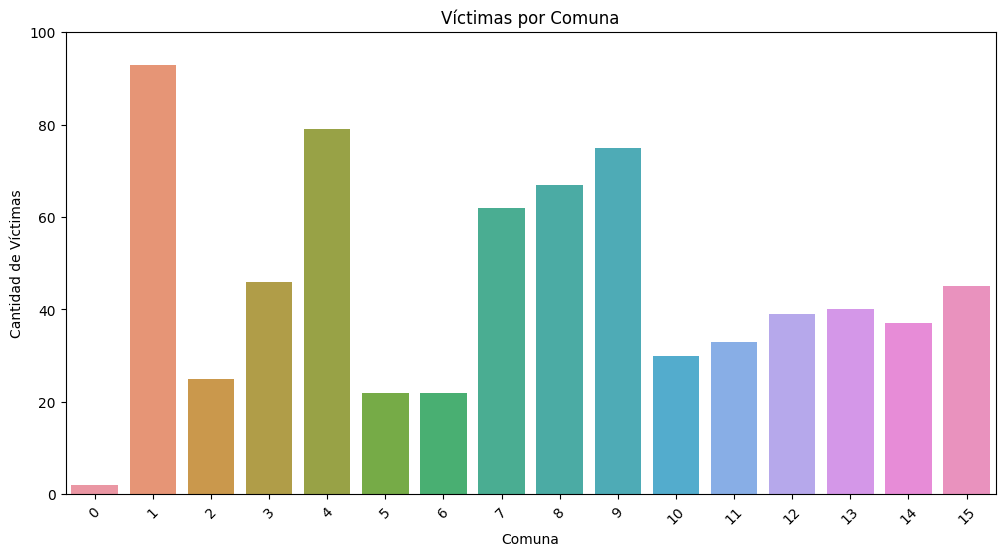

In [28]:
# Se genera una grafica que nos ayude a entender mejor los datos
suma_victimas_por_comuna = df_homicidios.groupby("COMUNA")["N_VICTIMAS"].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=suma_victimas_por_comuna, x="COMUNA", y="N_VICTIMAS")
plt.title("Víctimas por Comuna")
plt.xlabel("Comuna")
plt.ylabel("Cantidad de Víctimas")
plt.xticks(rotation=45)
plt.ylim(0, 100)
plt.show()

Se puede ver claramente que la comuna con mayor número de victimas es la comuna 1, seguida de la 4 y la nueve. Se cree que la calle más peligrosa tiene que pasar por aqui por lo que se genera una comparativa.

Se utiliza el dataframe creado para el mapa para conocer la respuesta



In [29]:
df_Gen_Paz["COMUNA"].unique()

array([ 9,  8, 13, 12, 11], dtype=int64)

Se quiere saber que comuna es mas peligrosa en el tiempo por lo que se plantea con una grafica descubrir si la comuna más peligrosa cambia con el tiempo.

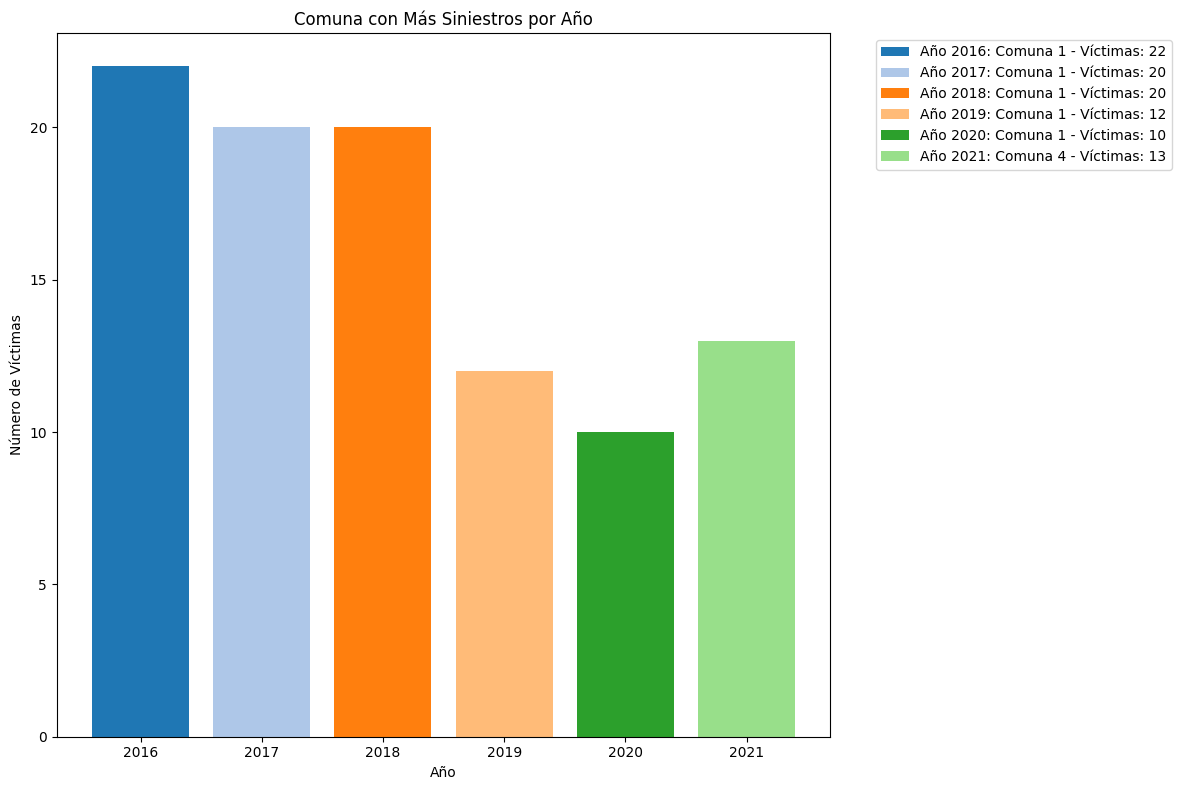

In [31]:
# Agrupa los datos por año y comuna, sumando el número de víctimas
agrupado_por_anio_comuna = df_homicidios.groupby(["AAAA", "COMUNA"])["N_VICTIMAS"].sum().reset_index()

# Inicializa la figura y el eje
fig, ax = plt.subplots(figsize=(12, 8))

# Diccionario de colores para cada comuna
colors = plt.cm.tab20.colors[:len(agrupado_por_anio_comuna["COMUNA"].unique())]

# Itera a través de cada año para encontrar la comuna con más siniestros y graficarla
for i, year in enumerate(agrupado_por_anio_comuna["AAAA"].unique()):
    df_year_new = agrupado_por_anio_comuna[agrupado_por_anio_comuna["AAAA"] == year]
    max_comuna = df_year_new.loc[df_year_new["N_VICTIMAS"].idxmax()]
    ax.bar(str(year), max_comuna["N_VICTIMAS"], color=colors[i], label=f"Año {year}: Comuna {max_comuna['COMUNA']} - Víctimas: {max_comuna['N_VICTIMAS']}")

# Configura etiquetas y título
ax.set_xlabel("Año")
ax.set_ylabel("Número de Víctimas")
ax.set_title("Comuna con Más Siniestros por Año")
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Muestra el gráfico
plt.tight_layout()
plt.show()


 debe tener una amplia extension territorial y ese debe ser el motivo de porque tiene tantos accidentes viales por lo que se busco información relacionada a ello.

Se obtuvieron datos de wikipedia para conocer el tamaño de las comunas de la siguiente dirección https://es.wikipedia.org/wiki/Comunas_de_la_ciudad_de_Buenos_Aires

Con ello se quiere contrastar el tamaño de las comunas con su letalidad.

Realizo el web scraping 

In [32]:
import requests
from bs4 import BeautifulSoup

# URL de la página de Wikipedia
url = 'https://es.wikipedia.org/wiki/Comunas_de_la_ciudad_de_Buenos_Aires'

# Realizar la solicitud GET a la URL
response = requests.get(url)

# Parsear el HTML usando BeautifulSoup
soup = BeautifulSoup(response.content, 'html.parser')

# Buscar la tabla que contiene la información de las comunas
tabla_comunas = soup.find('table', {'class': 'wikitable'})

# Extraer la información de interés de la tabla
datos_comunas = []
for fila in tabla_comunas.find_all('tr')[1:]:  # Ignorar la primera fila que contiene los encabezados
    columnas = fila.find_all('td')
    nombre_comuna = columnas[0].text.strip()
    extension_territorial = columnas[1].text.strip()
    datos_comunas.append({'Comuna': nombre_comuna, 'Extensión Territorial': extension_territorial})

# Mostrar los datos obtenidos
for comuna in datos_comunas:
    print(comuna)


{'Comuna': 'Comuna 1', 'Extensión Territorial': '2005'}
{'Comuna': 'Comuna 2', 'Extensión Territorial': '2005'}
{'Comuna': 'Comuna 3', 'Extensión Territorial': '2006'}
{'Comuna': 'Comuna 4', 'Extensión Territorial': '2005'}
{'Comuna': 'Comuna 5', 'Extensión Territorial': '2005'}
{'Comuna': 'Comuna 6', 'Extensión Territorial': '2005'}
{'Comuna': 'Comuna 7', 'Extensión Territorial': '2005'}
{'Comuna': 'Comuna 8', 'Extensión Territorial': '2005'}
{'Comuna': 'Comuna 9', 'Extensión Territorial': '2005'}
{'Comuna': 'Comuna 10', 'Extensión Territorial': '2005'}
{'Comuna': 'Comuna 11', 'Extensión Territorial': '2005'}
{'Comuna': 'Comuna 12', 'Extensión Territorial': '2005'}
{'Comuna': 'Comuna 13', 'Extensión Territorial': '2005'}
{'Comuna': 'Comuna 14', 'Extensión Territorial': '2005'}
{'Comuna': 'Comuna 15', 'Extensión Territorial': '2005'}


In [33]:

# URL de la página de Wikipedia
url = 'https://es.wikipedia.org/wiki/Comunas_de_la_ciudad_de_Buenos_Aires'

# Realizar la solicitud GET a la URL
response = requests.get(url)

# Parsear el HTML usando BeautifulSoup
soup = BeautifulSoup(response.content, 'html.parser')

# Buscar la tabla que contiene la información de las comunas
tabla_comunas = soup.find('table', {'class': 'wikitable'})

# Extraer la información de interés de la tabla (nombre, extensión territorial y población)
datos_comunas = []
for fila in tabla_comunas.find_all('tr')[1:]:  # Ignorar la primera fila que contiene los encabezados
    columnas = fila.find_all('td')
    nombre_comuna = columnas[0].text.strip()
    extension_territorial = columnas[1].text.strip()
    poblacion = columnas[2].text.strip()  # Obtener la población
    datos_comunas.append({'Comuna': nombre_comuna, 'Extensión Territorial': extension_territorial, 'Población': poblacion})

# Mostrar los datos obtenidos
for comuna in datos_comunas:
    print(comuna)


{'Comuna': 'Comuna 1', 'Extensión Territorial': '2005', 'Población': 'A partir de la sanción de la Ley 1777Límites fijados en 2008'}
{'Comuna': 'Comuna 2', 'Extensión Territorial': '2005', 'Población': 'A partir de la sanción de la Ley 1777Límites fijados en 2008'}
{'Comuna': 'Comuna 3', 'Extensión Territorial': '2006', 'Población': 'A partir de la sanción de la Ley 1777Límites fijados en 2008'}
{'Comuna': 'Comuna 4', 'Extensión Territorial': '2005', 'Población': 'A partir de la sanción de la Ley 1777Límites fijados en 2008'}
{'Comuna': 'Comuna 5', 'Extensión Territorial': '2005', 'Población': 'A partir de la sanción de la Ley 1777Límites fijados en 2008'}
{'Comuna': 'Comuna 6', 'Extensión Territorial': '2005', 'Población': 'A partir de la sanción de la Ley 1777Límites fijados en 2008'}
{'Comuna': 'Comuna 7', 'Extensión Territorial': '2005', 'Población': 'A partir de la sanción de la Ley 1777Límites fijados en 2008'}
{'Comuna': 'Comuna 8', 'Extensión Territorial': '2005', 'Población': 

In [34]:
import csv

# URL de la página de Wikipedia
url = 'https://es.wikipedia.org/wiki/Comunas_de_la_ciudad_de_Buenos_Aires'

# Realizar la solicitud GET a la URL
response = requests.get(url)

# Parsear el HTML usando BeautifulSoup
soup = BeautifulSoup(response.content, 'html.parser')

# Buscar la tabla que contiene la información de las comunas
tabla_comunas = soup.find('table', {'class': 'wikitable'})

# Extraer la información de interés de la tabla (nombre, extensión territorial y población)
datos_comunas = []
for fila in tabla_comunas.find_all('tr')[1:]:  # Ignorar la primera fila que contiene los encabezados
    columnas = fila.find_all('td')
    nombre_comuna = columnas[0].text.strip()
    extension_territorial = columnas[1].text.strip()
    poblacion = columnas[2].text.strip()  # Obtener la población
    datos_comunas.append([nombre_comuna, extension_territorial, poblacion])

# Escribir los datos en un archivo CSV
with open('informacion_comunas.csv', 'w', newline='', encoding='utf-8') as archivo_csv:
    escritor_csv = csv.writer(archivo_csv)
    # Escribir los encabezados
    escritor_csv.writerow(['Comuna', 'Extensión Territorial', 'Población'])
    # Escribir los datos de cada comuna
    escritor_csv.writerows(datos_comunas)

print("Datos exportados a 'informacion_comunas.csv'")

Datos exportados a 'informacion_comunas.csv'


Analisis de General Paz en el tiempo
Se habia encontrado que la avenida General Paz es la más peligrosa y esto se debe a que atravieza muchas Comunas, entonces se busaca saber si las muertes se han reducido a lo largo de los años o si se mantienen constantes.

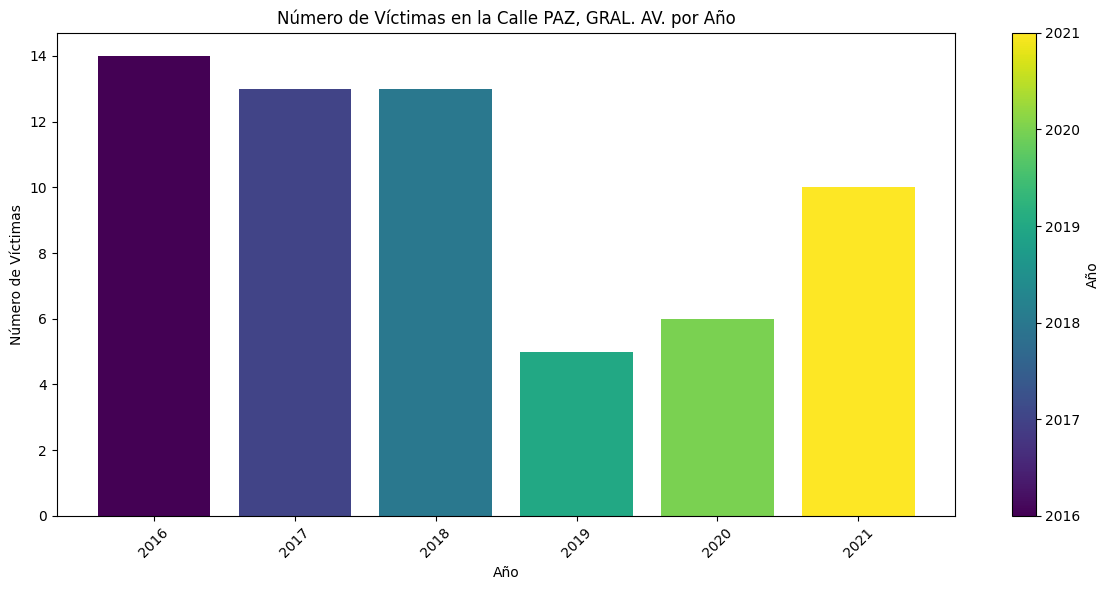

In [37]:
# Se filtra el DataFrame para obtener las filas donde 'Calle' sea igual a 'PAZ, GRAL. AV.'
df_Gen_Paz = df_homicidios[df_homicidios["Calle"] == "PAZ, GRAL. AV."]

# Se agrupa por año y se calcula el número de víctimas anual
grupo_anio = df_Gen_Paz.groupby("AAAA")["N_VICTIMAS"].sum().reset_index()

# Configuración de colores y estilo
colors = plt.cm.viridis(np.linspace(0, 1, len(grupo_anio)))  # Colores basados en una paleta predefinida
plt.figure(figsize=(12, 6))
bars = plt.bar(grupo_anio["AAAA"], grupo_anio["N_VICTIMAS"], color=colors)

# Ajustes estéticos
plt.xlabel("Año")
plt.ylabel("Número de Víctimas")
plt.title("Número de Víctimas en la Calle PAZ, GRAL. AV. por Año")
plt.xticks(rotation=45)  # Rotar los ticks del eje x para una mejor visualización

# Mostrar la barra de colores para representar los años
sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=grupo_anio["AAAA"].min(), vmax=grupo_anio["AAAA"].max()))
sm._A = []  # Necesario para evitar un error
plt.colorbar(sm, ax=plt.gca(), label='Año')

# Para mostrar el gráfico
plt.tight_layout()
plt.show()


Número de victimas por hora del día
Se piensa que la hora del día puede estar relacionada con el número de siniestros debido a la movilidad en la ciudad

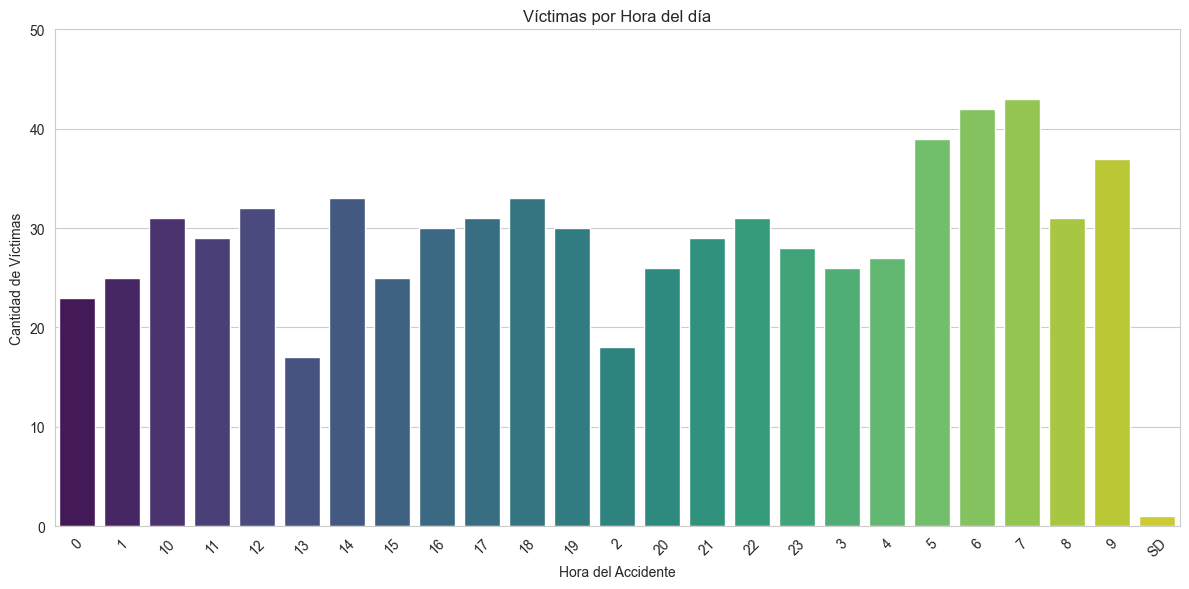

In [39]:
import seaborn as sns

# Agrupar por hora y calcular el número total de víctimas por hora
suma_victimas_por_hora = df_homicidios.groupby("HH")["N_VICTIMAS"].sum().reset_index()

# Configuración del estilo utilizando seaborn
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")  # Estilo de la cuadrícula blanca
sns.barplot(data=suma_victimas_por_hora, x="HH", y="N_VICTIMAS", palette="viridis")
plt.title("Víctimas por Hora del día")
plt.xlabel("Hora del Accidente")
plt.ylabel("Cantidad de Víctimas")
plt.xticks(rotation=45)
plt.ylim(0, 50)  # Establecer límites en el eje y para una mejor visualización

# Mostrar el gráfico
plt.tight_layout()
plt.show()


Aunque la distribucion de cantidad de victimas por hora esta distribuida en todas horas, se puede ver que entre 6 y 7 se encuentra el mayor numero de victimas lo cual coincide a las horas en las que la gente se desplaza al trabajo.

Victimas por mes cada año
Se quiere saber si hay meses en donde ocurran más acidentes ya se piensa que esto nos puede ayudar a entender mejor el porque de los siniestros.

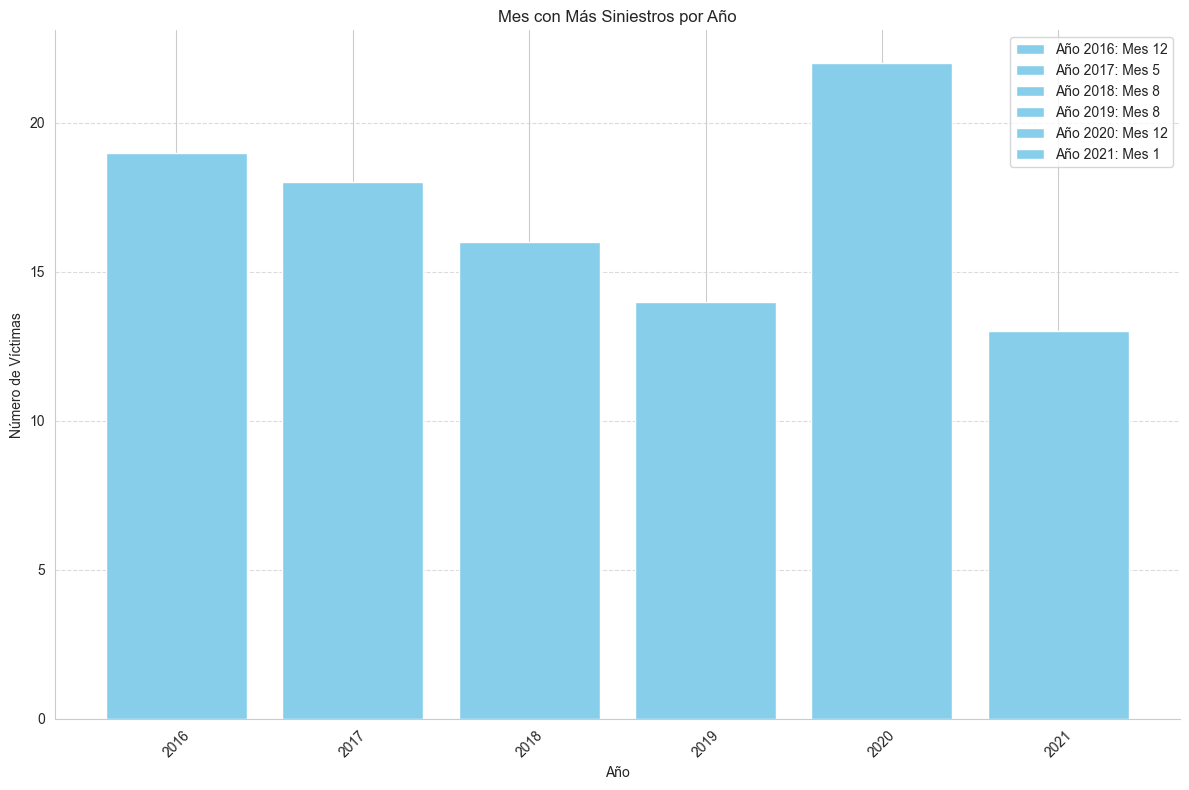

In [40]:
# Se genera un dataframe para el filtro
agrupado_por_anio_mes = df_homicidios.groupby(["AAAA", "MM"])["N_VICTIMAS"].sum().reset_index()

# Se inicializa la figura y el eje
fig, ax = plt.subplots(figsize=(12, 8))

# Iteración a través de cada año para encontrar el mes con más siniestros
for year in agrupado_por_anio_mes["AAAA"].unique():
    df_year = agrupado_por_anio_mes[agrupado_por_anio_mes["AAAA"] == year]
    max_month = df_year.loc[df_year["N_VICTIMAS"].idxmax()]["MM"]
    max_victims = df_year["N_VICTIMAS"].max()
    ax.bar(str(year), max_victims, label=f"Año {year}: Mes {max_month}", color='skyblue')

# Configuración de etiquetas y título
ax.set_xlabel("Año")
ax.set_ylabel("Número de Víctimas")
ax.set_title("Mes con Más Siniestros por Año")
ax.legend()

# Personalización de la apariencia
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


Se puede ver que los meses más peligrosos son diciembre y Agosto, siendo diciembre el més que tiene mayor letalidad por año. Siendo diciembre del 2020 el año con más letalidad pero al ser numeros pequeños esto puede ser por motivo de accidentes multiples y no de otra causa.

Victimas por Acusado
Se quiere saber que tipo de vehiculo o motivo causa la mayor cantidad de siniestros por lo que se busca agrupar al tipo de victima por acusado.

Esto nos permite saber tambien a que tipo de personas tiene mayor propencion a morir en un accidente vial.

<Figure size 1200x800 with 0 Axes>

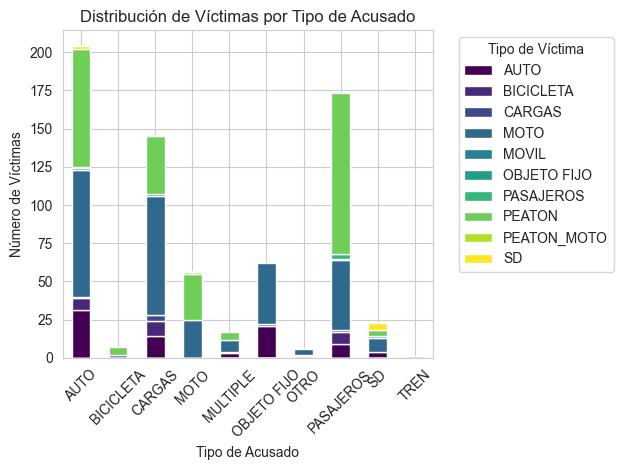

In [41]:
# Creación de la tabla pivot para el gráfico
tabla_acusados = df_homicidios.pivot_table(index="ACUSADO", columns="VICTIMA", aggfunc="size", fill_value=0)

# Gráfico con estilo más atractivo
plt.figure(figsize=(12, 8))

# Tipo de gráfico
tabla_acusados.plot(kind="bar", stacked=True, colormap='viridis')

# Configuración del título y etiquetas
plt.title("Distribución de Víctimas por Tipo de Acusado")
plt.xlabel("Tipo de Acusado")
plt.ylabel("Número de Víctimas")

# Personalización adicional
plt.legend(title='Tipo de Víctima', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar el gráfico
plt.show()


In [42]:
tabla_acusados

VICTIMA,AUTO,BICICLETA,CARGAS,MOTO,MOVIL,OBJETO FIJO,PASAJEROS,PEATON,PEATON_MOTO,SD
ACUSADO,,,,,,,,,,
AUTO,31,8,1,83,0,1,1,77,0,2
BICICLETA,0,0,0,2,0,0,0,5,0,0
CARGAS,14,10,4,78,1,0,0,38,0,1
MOTO,0,0,0,25,0,0,0,30,1,1
MULTIPLE,3,1,0,8,0,0,0,5,0,0
OBJETO FIJO,21,0,1,40,0,0,0,0,0,0
OTRO,1,1,0,4,0,0,0,0,0,0
PASAJEROS,9,8,1,46,1,0,3,105,0,0
SD,4,0,0,9,0,0,1,4,0,5


Se puede observar que las motos y los peatones son las personas más propensas a morir en un accidente vial, ademas de que los autos, vehiculos de cargas y de transporte son los que más muertes causan.

Tambien se puede ver que el tren es el que menor cantidad de muertes a causado.

Tipo de calle
Se piensa que el tipo de calle puede influir en la cantidad de muertes que se presentan por lo que se decidió ver que información se puede obtener de este enfoque.

<Figure size 1200x800 with 0 Axes>

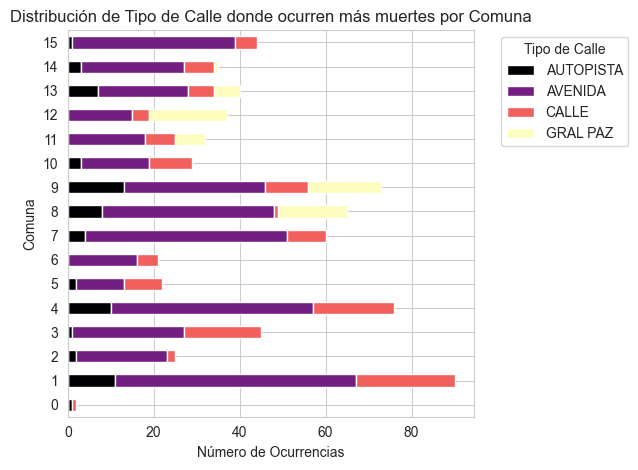

In [43]:
# Creación de la tabla pivot para el gráfico
pivot_table_3 = df_homicidios.pivot_table(index="COMUNA", columns="TIPO_DE_CALLE", aggfunc="size", fill_value=0)

# Gráfico con estilo más atractivo
plt.figure(figsize=(12, 8))

# Tipo de gráfico
pivot_table_3.plot(kind="barh", stacked=True, colormap='magma')

# Configuración del título y etiquetas
plt.title("Distribución de Tipo de Calle donde ocurren más muertes por Comuna")
plt.xlabel("Número de Ocurrencias")
plt.ylabel("Comuna")

# Personalización adicional
plt.legend(title='Tipo de Calle', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Mostrar el gráfico
plt.show()


Se observa que la comuna 1 tiene un mayor numero de calles, de entre estas calles avenidas por lo que podemos concluir que al ser más grande, tiene mayor probabilidad de causar accidentes.

Victimas por Sexo
Se busco si el sexo de las victimas jugaba un rol importante ya que se quiere conocer bien si esto afecta de alguna forma la posibilidad de morir en un siniestro vial.

In [47]:
# Cargar el archivo CSV en un DataFrame
data = pd.read_csv('Data/VICTIMAS.csv')


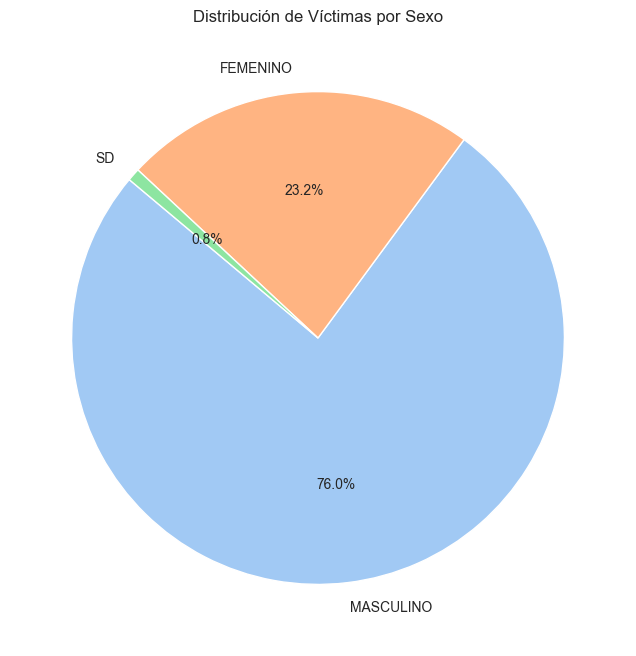

In [49]:
# Contar la cantidad de cada sexo
conteo_sexo = data["SEXO"].value_counts()

# Crear una paleta de colores pastel
colores_pastel = sns.color_palette("pastel")

# Crear la gráfica de pastel
plt.figure(figsize=(8, 8))
plt.pie(conteo_sexo, labels=conteo_sexo.index, autopct='%1.1f%%', startangle=140, colors=colores_pastel)

# Añadir un título
plt.title("Distribución de Víctimas por Sexo")

# Mostrar la gráfica
plt.show()


Se puede ver claramente que la mayoria de las victimas son hombres,  el 76% lo cual indica que hay una mayor probabilidad de accidentarte si eres hombre. Se quiere ver si el rol de las victimas tiene algo que ver con esa distribución.

In [50]:
# Se crea una tabla entre 'VICTIMA', 'ROL' y 'SEXO'
tabla_sexo = pd.crosstab([data["VICTIMA"], data["ROL"]], data["SEXO"])

tabla_sexo

SEXO                            FEMENINO  MASCULINO  SD
VICTIMA   ROL                                          
AUTO      CONDUCTOR                    5         60   0
          PASAJERO_ACOMPAÑANTE        10         19   0
BICICLETA CICLISTA                     8         21   0
CARGAS    CONDUCTOR                    0          3   0
          PASAJERO_ACOMPAÑANTE         0          4   0
MOTO      CONDUCTOR                   15        244   2
          PASAJERO_ACOMPAÑANTE        20         19   0
          SD                           1          1   1
MOVIL     CONDUCTOR                    0          1   0
          PASAJERO_ACOMPAÑANTE         0          2   0
PASAJEROS PASAJERO_ACOMPAÑANTE         3          2   0
PEATON    PEATON                     103        163   1
SD        PASAJERO_ACOMPAÑANTE         1          0   0
          SD                           0          6   2

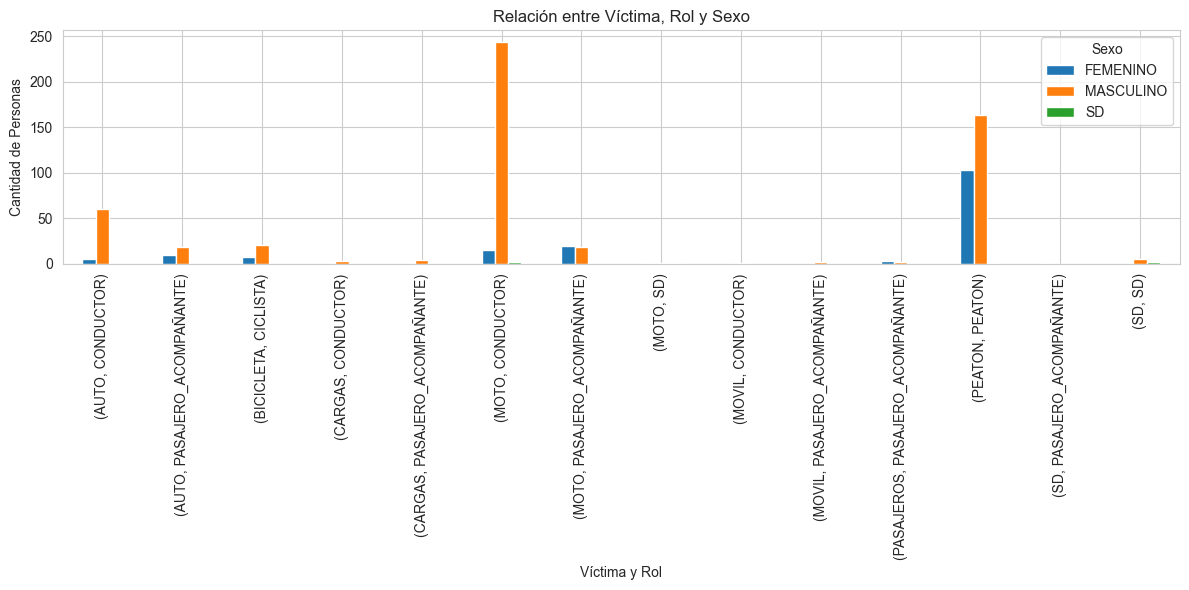

In [51]:
# Se crea un gráfico de barras agrupadas
tabla_sexo.plot(kind="bar", figsize=(12, 6))

# Se configuran las etiquetas y el título
plt.xlabel("Víctima y Rol")
plt.ylabel("Cantidad de Personas")
plt.title("Relación entre Víctima, Rol y Sexo")

# Se muestra el gráfico
plt.tight_layout()
plt.legend(title="Sexo")

plt.show()

Claramente se puede ver que la mayoria de las victimas son hombres conductores de moto. Esto nos indica que son el grupo que es más propenso a tener accidentes y que al disminuir la cantidad de accidentes se pueden disminuir la cantidad de muertes que les ocurren.

Entonces se quiere saber el porcentaje de hombres y mujeres en moto que mueren en siniestros viales.

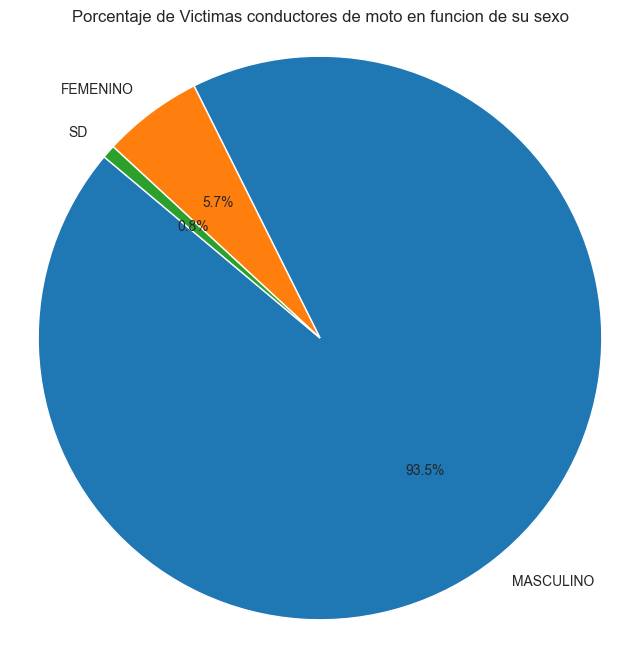

In [56]:
condiciones1 = (data["VICTIMA"] == "MOTO") & (data["ROL"] == "CONDUCTOR")
df_filtrado = data[condiciones1]
porcentaje_sexo = df_filtrado["SEXO"].value_counts(normalize=True) * 100
plt.figure(figsize=(8, 8))
plt.pie(porcentaje_sexo, labels=porcentaje_sexo.index, autopct='%1.1f%%', startangle=140)
plt.title("Porcentaje de Victimas conductores de moto en funcion de su sexo")
plt.axis("equal")  # Para asegurarse de que el gráfico sea un círculo
plt.show()

Edad de las Victimas
Se desea saber si la edad de las victimas tiene que ver con la probabilidad de morir en un siniestro vial.

C:\Users\Usuario\AppData\Local\Temp\ipykernel_1700\1518943108.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado["EDAD"] = pd.to_numeric(df_filtrado["EDAD"], errors="coerce")


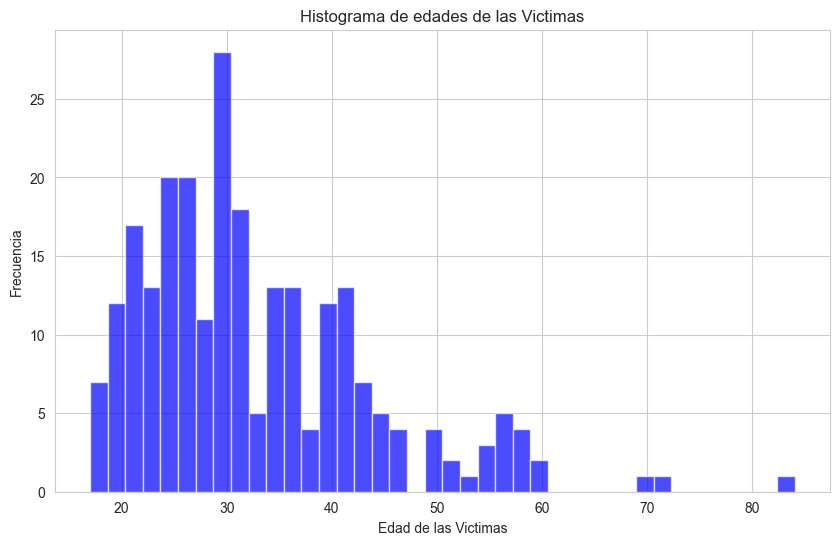

In [57]:
# Se filtran los valores de edad quitando los que no tienen datos
df_edad = data[data["EDAD"] != "SD"]

# Se convierten los valores de la columna edad a numericos por si hay algun error
df_filtrado["EDAD"] = pd.to_numeric(df_filtrado["EDAD"], errors="coerce")

# Crea un histograma para visualizar la distribución de días al fallecimiento
plt.figure(figsize=(10, 6))
plt.hist(df_filtrado["EDAD"], bins=40, color="blue", alpha=0.7)
plt.xlabel("Edad de las Victimas")
plt.ylabel("Frecuencia")
plt.title("Histograma de edades de las Victimas")
plt.grid(True)
plt.show()

Se observa que la mayoria son personas de 20 a 40 años y se tiene la hipotesis de que son conductores de motocicleta.

Para ello se debe segmentar las edades para poder hacer un mejor analisis, más completo

In [63]:
data["EDAD"].replace("SD", -1, inplace=True)
data["EDAD"] = data["EDAD"].astype(int)
data["EDAD_SEGMENTADA"] = pd.cut(data["EDAD"], bins=[0, 20, 40, 60, 80, 100], labels=["0-19", "20-39", "40-59", "60-79", "80-99"])


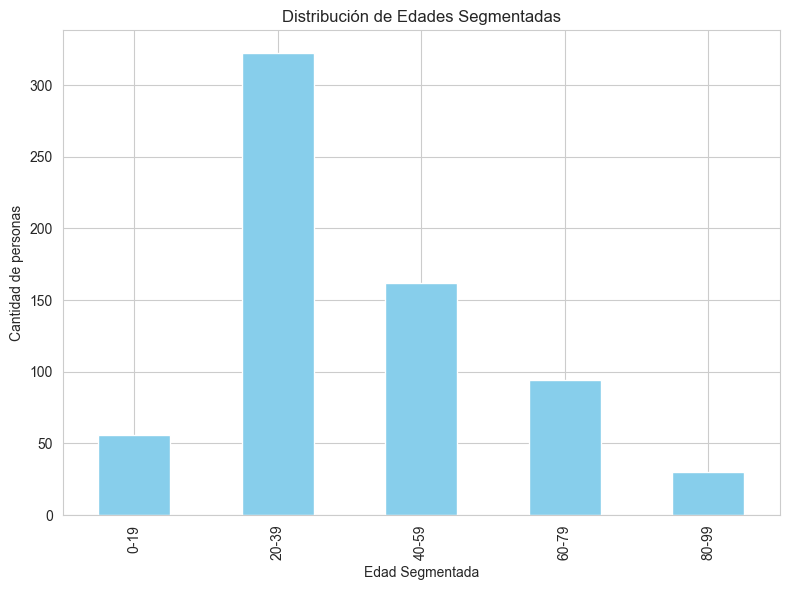

In [65]:
# Graficar la distribución de las edades segmentadas
plt.figure(figsize=(8, 6))
data["EDAD_SEGMENTADA"].value_counts().sort_index().plot(kind='bar', color='skyblue')

# Configuración de etiquetas y título
plt.xlabel('Edad Segmentada')
plt.ylabel('Cantidad de personas')
plt.title('Distribución de Edades Segmentadas')

# Mostrar la gráfica
plt.tight_layout()
plt.show()

Se puede observar claramente que la mayoria de las victimas los conductores de moto son en mayoria adultos jovenes de 20-39.

Lo cual suguiere fuertemente que el manejar de forma imprudente puede ser el motivo de porque hay tantos accidentes viales.

Gravedad del accidente
Se quiere saber que tan fatales son los accidentes por edad por lo que, se deben segmentar los dias al fallecimiento para mejorar la legibilidad del analisis

In [68]:
data["DIAS_AL_FALLECIMIENTO"].replace("SD", -1, inplace=True)
data["DIAS_AL_FALLECIMIENTO"] = data["DIAS_AL_FALLECIMIENTO"].astype(int)
data["FALLECIMIENTO_SEGMENTADO"] = pd.cut(data["DIAS_AL_FALLECIMIENTO"], bins=[0, 3, 6, 9, 12, 15, 18, 21, 24])


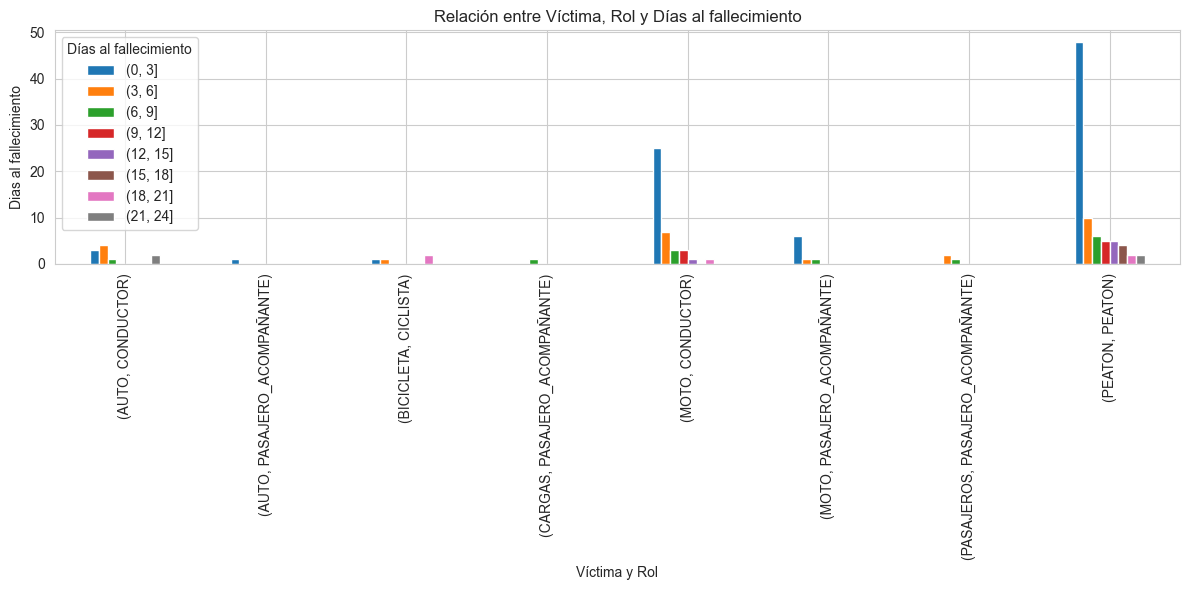

In [69]:
# Filtra los valores 'SD' (sin datos) antes de graficar
df_filtrado= data[data["FALLECIMIENTO_SEGMENTADO"] != "SD"]

# Crea una tabla de contingencia entre 'VICTIMA', 'ROL' y 'DIAS_AL_FALLECIMIENTO'
tabla_contingencia = pd.crosstab([data["VICTIMA"], data["ROL"]], data["FALLECIMIENTO_SEGMENTADO"])

# Crea un gráfico de barras agrupadas
tabla_contingencia.plot(kind="bar", figsize=(12, 6))

# Configura etiquetas y título
plt.xlabel("Víctima y Rol")
plt.ylabel("Dias al fallecimiento")
plt.title("Relación entre Víctima, Rol y Días al fallecimiento")

# Muestra el gráfico
plt.tight_layout()
plt.legend(title="Días al fallecimiento")
plt.show()

Se puede ver que los siniestros más graves les ocurren a peatones ya que la muerte suele ser inmediata pero tiene todo el espectro edades, mientras que los ciclistas y los conductores de auto son los que más tardan en morir segun el tipo de accidente.

Influencia de los Cruces
Se quiere saber si los cruces tienen que ver con el numero de personas que mueren y de ser así que rol tienen en los accidentes

In [70]:
# Se generan las mascaras necesarias para saber el numero de victimas si hay o no cruce
victimas_con_cruce_true = df_homicidios[df_homicidios["Hay Cruce"] == True]["N_VICTIMAS"].sum()
victimas_con_cruce_false = df_homicidios[df_homicidios["Hay Cruce"] == False]["N_VICTIMAS"].sum()

print(f"Cantidad de víctimas cuando CRUCE es True: {victimas_con_cruce_true}")
print(f"Cantidad de víctimas cuando CRUCE es False: {victimas_con_cruce_false}")

Cantidad de víctimas cuando CRUCE es True: 540
Cantidad de víctimas cuando CRUCE es False: 177


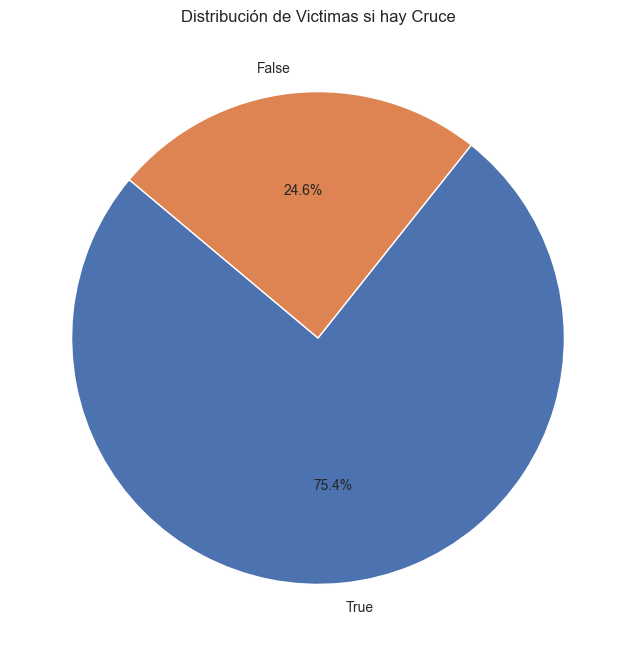

In [71]:
# Se genera una grafica para conocer el porcentaje de victimas que hay dependiendo si existe Cruce

# Contar la cantidad de cada sexo
conteo_cruce = df_homicidios["Hay Cruce"].value_counts()

# Crear la gráfica de pastel
plt.figure(figsize=(8, 8))
plt.pie(conteo_cruce, labels=conteo_cruce.index, autopct="%1.1f%%", startangle=140, colors=sns.color_palette("deep"))

# Añadir un título
plt.title("Distribución de Victimas si hay Cruce")

# Mostrar la gráfica
plt.show()

Se puede ver claramente que la existencia de cruces aumenta mucho la cantidad de victimas. Se desea ver que tipo de victima aumenta mayormente en los cruces ya que podria ser de utilidad para saber si se requiere invertir más en infraestructura.